<a href="https://colab.research.google.com/github/krogul222/Cooking_recipe_to_cuisine/blob/master/Cooking_recipes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [25]:
!pip install kaggle

In [26]:
import os

try:
  os.mkdir("/content/.kaggle/")
except:
  print("Directory already exists")
  
try:
  os.mknod("/content/.kaggle/kaggle.json")
except:
  print("File already exists")


Directory already exists
File already exists


In [0]:
import json

token = {"username":"krogul","key":"b29cbb6b4f1e3ca9ac19cd38d2c0809f"}

with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [28]:
try:
  os.mkdir("~/.kaggle/")
except:
  print("Directory already exists")

try:
  os.mknod("~/.kaggle/kaggle.json")
except:
  print("File already exists")


Directory already exists
File already exists


In [0]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

In [30]:
!kaggle config set -n path -v{/content}

- path is now set to: {/content}


In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [32]:
!kaggle competitions download -c whats-cooking-kernels-only -p /content

  0% 0.00/25.8k [00:00<?, ?B/s]
100% 25.8k/25.8k [00:00<00:00, 46.3MB/s]
  0% 0.00/437k [00:00<?, ?B/s]
100% 437k/437k [00:00<00:00, 61.9MB/s]
  0% 0.00/1.80M [00:00<?, ?B/s]
100% 1.80M/1.80M [00:00<00:00, 119MB/s]


In [33]:
!unzip \*.zip

Archive:  test.json.zip
  inflating: test.json               

Archive:  sample_submission.csv.zip
  inflating: sample_submission.csv   

Archive:  train.json.zip
  inflating: train.json              

3 archives were successfully processed.


In [34]:
import pandas as pd

train = pd.read_json('train.json')

test = pd.read_json('test.json')

train.head(10)



,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."
5,jamaican,6602,"[plain flour, sugar, butter, eggs, fresh ginge..."
6,spanish,42779,"[olive oil, salt, medium shrimp, pepper, garli..."
7,italian,3735,"[sugar, pistachio nuts, white almond bark, flo..."
8,mexican,16903,"[olive oil, purple onion, fresh pineapple, por..."
9,italian,12734,"[chopped tomatoes, fresh basil, garlic, extra-..."


In [35]:
train['numberOfIngredients'] = train['ingredients'].apply(lambda x: len(x))
test['numberOfIngredients'] = test['ingredients'].apply(lambda x: len(x))
train.head(10)
test.head(10)

,id,ingredients,numberOfIngredients
0,18009,"[baking powder, eggs, all-purpose flour, raisi...",6
1,28583,"[sugar, egg yolks, corn starch, cream of tarta...",11
2,41580,"[sausage links, fennel bulb, fronds, olive oil...",6
3,29752,"[meat cuts, file powder, smoked sausage, okra,...",21
4,35687,"[ground black pepper, salt, sausage casings, l...",8
5,38527,"[baking powder, all-purpose flour, peach slice...",9
6,19666,"[grape juice, orange, white zinfandel]",3
7,41217,"[ground ginger, white pepper, green onions, or...",16
8,28753,"[diced onions, taco seasoning mix, all-purpose...",17
9,22659,"[eggs, cherries, dates, dark muscovado sugar, ...",16


In [36]:
train.describe()

,id,numberOfIngredients
count,39774.000000,39774.000000
mean,24849.536959,10.767713
std,14360.035505,4.428978
min,0.000000,1.000000
25%,12398.250000,8.000000
50%,24887.000000,10.000000
75%,37328.500000,13.000000
max,49717.000000,65.000000


In [37]:
print(train['cuisine'].unique())

['greek' 'southern_us' 'filipino' 'indian' 'jamaican' 'spanish' 'italian'
 'mexican' 'chinese' 'british' 'thai' 'vietnamese' 'cajun_creole'
 'brazilian' 'french' 'japanese' 'irish' 'korean' 'moroccan' 'russian']


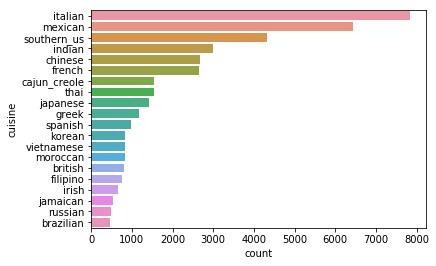

In [38]:
sns.countplot(y="cuisine", data=train, order = train['cuisine'].value_counts().index)

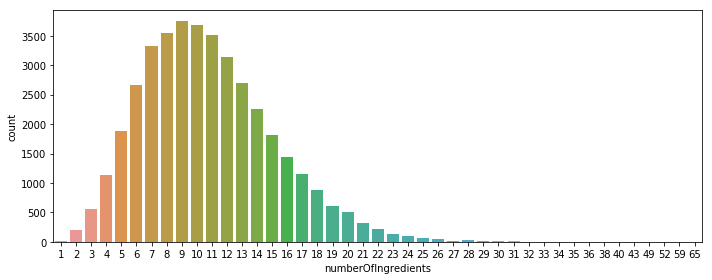

In [39]:
plt.figure(figsize=(10,4))
ax = sns.countplot(x="numberOfIngredients", data=train)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [40]:
train[train['numberOfIngredients'] == 1].head(10)

,cuisine,id,ingredients,numberOfIngredients
940,japanese,4734,[sushi rice],1
2088,vietnamese,7833,[dried rice noodles],1
6787,indian,36818,[plain low-fat yogurt],1
7011,indian,19772,[unsalted butter],1
8181,japanese,16116,[udon],1
8852,thai,29738,[sticky rice],1
8990,indian,41124,[butter],1
10506,mexican,32631,[corn tortillas],1
13178,thai,29570,[grained],1
17804,southern_us,29849,[lemonade concentrate],1


In [56]:
greek = train.loc[train.cuisine == 'greek', 'ingredients'].values

greek_ing=[]

for i in greek:
  for j in i:
    greek_ing.append(j)
print (greek_ing)

values, counts = np.unique(greek_ing, return_counts=True)

greek_df = pd.DataFrame()

greek_df['ing'] = values
greek_df['counts'] = counts

greek_df.sort_values('counts', ascending = 0).head(20)

['romaine lettuce', 'black olives', 'grape tomatoes', 'garlic', 'pepper', 'purple onion', 'seasoning', 'garbanzo beans', 'feta cheese crumbles', 'ground pork', 'finely chopped fresh parsley', 'onions', 'salt', 'vinegar', 'caul fat', 'minced garlic', 'dried oregano', 'red wine vinegar', 'olive oil', 'boneless chop pork', 'lemon juice', 'orange', 'anise', 'cinnamon sticks', 'unflavored gelatin', 'zinfandel', 'orange blossom honey', 'sugar', 'lemon', 'calimyrna figs', 'clove', 'honey', 'whipping cream', 'plain whole-milk yogurt', 'fresh dill', 'yoghurt', 'salt', 'myzithra', 'large eggs', 'cheese', 'feta cheese', 'phyllo', 'kefalotyri', 'ground black pepper', 'extra-virgin olive oil', 'onions', 'olive oil', 'salt', 'hamburger buns', 'paprika', 'chopped fresh mint', 'ground cinnamon', 'balsamic vinegar', 'feta cheese crumbles', 'baby spinach leaves', 'purple onion', 'ground lamb', 'pepper', 'dried mint flakes', 'salt', 'dried oregano', 'tomatoes', 'ground black pepper', 'garlic', 'dried dil

,ing,counts
974,salt,572
768,olive oil,504
364,dried oregano,267
494,garlic cloves,254
410,feta cheese crumbles,252
393,extra-virgin olive oil,229
454,fresh lemon juice,222
545,ground black pepper,221
493,garlic,216
820,pepper,203


In [42]:
train[train['numberOfIngredients'] == 4].head(10)

,cuisine,id,ingredients,numberOfIngredients
3,indian,22213,"[water, vegetable oil, wheat, salt]",4
16,british,34466,"[greek yogurt, lemon curd, confectioners sugar...",4
17,italian,1420,"[italian seasoning, broiler-fryer chicken, may...",4
18,thai,2941,"[sugar, hot chili, asian fish sauce, lime juice]",4
29,mexican,1299,"[flour tortillas, cheese, breakfast sausages, ...",4
54,italian,31119,"[lemon, pesto, salmon fillets, white wine]",4
58,italian,2646,"[pizza crust, plum tomatoes, pesto, part-skim ...",4
90,italian,31831,"[salt, starchy potatoes, grated nutmeg, flour]",4
132,mexican,41078,"[refried beans, grated jack cheese, hot sauce,...",4
149,italian,20919,"[shredded mozzarella cheese, marinara sauce, f...",4
